# Final Project: Part 1 EDA
## Ryan Engel

In this exploratory data analysis, we shall look at what makes a business successful as measured by a high star rating. Because I have always thought owning a restaurant would be an interesting experience, we shall look at what makes one sucessful.

In [1]:
#First we load the libraries required for analysis and our first dataset, which contains infomation on businesses and attributes

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

businesses = pd.read_csv('data-sets/yelp_academic_dataset_business.csv')
checkin = pd.read_csv('data-sets/yelp_academic_dataset_checkin.csv')

In [2]:
#Taking a look at the variables available to us...
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
address                                  180970 non-null object
attributes                               0 non-null float64
attributes.AcceptsInsurance              11671 non-null object
attributes.AgesAllowed                   397 non-null object
attributes.Alcohol                       47892 non-null object
attributes.Ambience                      47577 non-null object
attributes.BYOB                          911 non-null object
attributes.BYOBCorkage                   1409 non-null object
attributes.BestNights                    6844 non-null object
attributes.BikeParking                   84891 non-null object
attributes.BusinessAcceptsBitcoin        12674 non-null object
attributes.BusinessAcceptsCreditCards    140391 non-null object
attributes.BusinessParking               103424 non-null object
attributes.ByAppointmentOnly             45423 non-null object
attributes.Ca

In [3]:
#and what the data looks like...
businesses.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,...,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,...,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


In [4]:
#By default the index is just an int value, but one of the columns is a business ID. This seems like it would make a better index
businesses.set_index('business_id', inplace=True)

In [5]:
#Check if index matches business dataframe's index
checkin.index

RangeIndex(start=0, stop=157075, step=1)

In [6]:
#Now we join the businesses dataset with the other checkin dataset after changing its index as well
businessesJoined = businesses.merge(checkin, how='left', left_index=True, right_index=True)
businessesJoined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188593 entries, Apn5Q_b6Nz61Tq4XzPdf9A to NkOvIueadjFUxeCyq_uQEw
Columns: 229 entries, address to time.Wed-9
dtypes: float64(174), int64(2), object(53)
memory usage: 335.9+ MB


I'm not honestly sure what purpose this combined dataframe serves but it felt fundamentally wrong not to use merge at least once in the final project.

In [7]:
#Due to large number of columns, 'categories' was not included in previous table. Here we look at that series specifically.
businesses.categories.sample(10)

business_id
yaEVPxUONZ8_-68KGeq10w                      Smog Check Stations, Automotive
I_RkxalxylAoseHesrgfJw    Bagels, Sandwiches, Breakfast & Brunch, Restau...
07nPF_eLxc_tYSto8Ag1mQ    Skin Care, Eyebrow Services, Shopping, Cosmeti...
5dy8OiWJty9AuxBcBzeBZQ                          Italian, Restaurants, Pizza
Mt2Z7acTISziIRK87c91fw                               Massage, Beauty & Spas
Hn7ZimIKh44w2POiRBgUFg    Health & Medical, Doctors, Family Practice, Wa...
l0VsufoVXSr0EJg6Z9rv3Q    Family Practice, Dentists, Health & Medical, G...
M5jKFdL0vLcBzdPh-mLnAQ    Bars, American (New), Restaurants, Nightlife, ...
pV6v4W2cb88R8APIcEBuvQ                Sporting Goods, Shopping, Guns & Ammo
7UE4N6ArCfLhOSISLXhGrg                              Automotive, Auto Repair
Name: categories, dtype: object

So categories includes some very useful information, but unfortunately it is composed of strings seperated by commas, making it difficult to quickly filter

In [8]:
#There are a lot of column names that include a period. 
#In order to avoid confusion these shall be changed to an underscore instead
fixedColumnNames = businesses.columns.str.replace('.', '_')
fixedColumnNames

Index(['address', 'attributes', 'attributes_AcceptsInsurance',
       'attributes_AgesAllowed', 'attributes_Alcohol', 'attributes_Ambience',
       'attributes_BYOB', 'attributes_BYOBCorkage', 'attributes_BestNights',
       'attributes_BikeParking', 'attributes_BusinessAcceptsBitcoin',
       'attributes_BusinessAcceptsCreditCards', 'attributes_BusinessParking',
       'attributes_ByAppointmentOnly', 'attributes_Caters',
       'attributes_CoatCheck', 'attributes_Corkage',
       'attributes_DietaryRestrictions', 'attributes_DogsAllowed',
       'attributes_DriveThru', 'attributes_GoodForDancing',
       'attributes_GoodForKids', 'attributes_GoodForMeal',
       'attributes_HairSpecializesIn', 'attributes_HappyHour',
       'attributes_HasTV', 'attributes_Music', 'attributes_NoiseLevel',
       'attributes_Open24Hours', 'attributes_OutdoorSeating',
       'attributes_RestaurantsAttire', 'attributes_RestaurantsCounterService',
       'attributes_RestaurantsDelivery', 'attributes_Restau

In [9]:
#Now that the column names are fixed, we can assign them back to the dataframe
businesses.columns = fixedColumnNames

Determining if any tidying needs to be done to rating data...

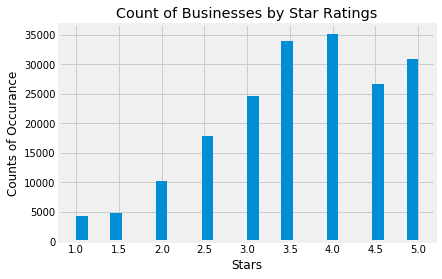

In [10]:
figure, axes = plt.subplots()
axes.hist(businesses.stars, bins = 30)
axes.set_title('Count of Businesses by Star Ratings')
axes.set_xlabel('Stars')
axes.set_ylabel('Counts of Occurance')
plt.show()

The above graph shows data within expected bounds. Does not appear to be any tidying required here either. Before we can proceed further we first we need to filter our data set to only include entries for restaurants. 

In [11]:
#The first way I accomplish this is to only use rows that have non-NA values in attributes_RestaurantsPriceRange2,
#with the logic being that if there is a value here, then it stands that it is a restaurant. 
businessesPrice = businesses.dropna(subset=['attributes_RestaurantsPriceRange2', 'stars', 'categories']).copy()
len(businessesPrice)

107089

In [12]:
#Another way (that feels less like cheating) is to only include entries that have the word restaurant (either capitalized or not)
#in the categories field. However this way leads to a little over half the entries as the previous way. 
businesses = businesses.dropna(subset=['categories']).copy()
restaurants = businesses[businesses.loc[:,'categories'].str.contains(r'.*[Rr]estaurant.*')]
len(restaurants)

57191

In [13]:
#Checking the entries that are in the first method's dataframe and not in the second dataframe. Specifically the category field
missingRestaurants = businessesPrice[~businessesPrice.index.isin(restaurants.index)]
missingRestaurants.categories.head().values

array(['Coffee & Tea, Food', 'Food, Bakeries',
       'Flowers & Gifts, Gift Shops, Shopping',
       'Shopping, Fashion, Department Stores',
       'Food, Bakeries, Coffee & Tea'], dtype=object)

From the above table we see that the first method is not 100% reliable, as it has included some businesses that are not restaurants nor sell food. This can be seen in the 4th row of the table, which shows the it is a department store. It has also shown, that some rows represent businesses that sell food that are not labeled with 'Restaurant' in the categories column. In order to include these, we shall add any that have the 'Food' tag in categories to the restaurant dataframe obtained via the second method above.

In [14]:
foodEntries = missingRestaurants[missingRestaurants.loc[:,'categories'].str.contains(r'.*[Ff]ood.*')]
restaurantsClean = pd.concat([restaurants, foodEntries])
len(restaurantsClean)

71371

In [15]:
#Just to confirm there are no more food selling businesses we are missing, the missingRestaurants comparision is performed again
missingRestaurants2 = businessesPrice[~businessesPrice.index.isin(restaurantsClean.index)].copy()
missingRestaurants2.categories.head(10).values

array(['Flowers & Gifts, Gift Shops, Shopping',
       'Shopping, Fashion, Department Stores',
       'Shopping, Gardeners, Home Services, Nurseries & Gardening, Landscaping, Home & Garden, Landscape Architects',
       'Health & Medical, Hair Salons, Skin Care, Hair Extensions, Medical Spas, Cryotherapy, Beauty & Spas',
       'Home Services, Shopping, Home & Garden, Kitchen & Bath, Interior Design',
       'Hair Salons, Beauty & Spas',
       'Thrift Stores, Shopping, Used, Vintage & Consignment, Antiques, Fashion, Auction Houses',
       'Pubs, Nightlife, Bars',
       'Waxing, Nail Salons, Eyelash Service, Beauty & Spas, Hair Removal',
       'Hair Salons, Beauty & Spas'], dtype=object)

After all this, we can be sure that no non-food selling businesses are in our restaurant dataframe. Now we can look at the price variable.

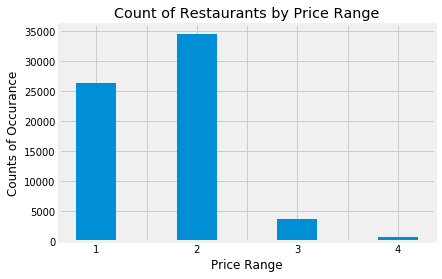

In [16]:
#Taking a look at the range of price values after dropping any NA values in price or star ratings.
restaurantPrice = restaurantsClean.dropna(subset=['attributes_RestaurantsPriceRange2', 'stars']).copy()
figure, axes = plt.subplots()
axes.hist(restaurantPrice.attributes_RestaurantsPriceRange2, bins =[.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2])
axes.set_title('Count of Restaurants by Price Range')
axes.set_xlabel('Price Range')
axes.set_ylabel('Counts of Occurance')
axes.set_xticklabels(['0', '1', '', '2', '', '3', '', '4'])
plt.show()

In [17]:
#Data looks pretty tidy already. Checking storage type of it...
type(restaurantPrice.attributes_RestaurantsPriceRange2[0])

numpy.float64

In [18]:
#From the graph we see that there are a large number of restaurants in the second price range category, but no values that are unexpected.
#For some reason, they are stored as floats opposed to integers. This is changed here to save on resources.
restaurantPrice.attributes_RestaurantsPriceRange2 = restaurantPrice.attributes_RestaurantsPriceRange2.astype(int)
type(restaurantPrice.attributes_RestaurantsPriceRange2[0])

numpy.int32

In [19]:
#Now to determine what price range the new restaurant should sell its food at.
restaurantByPrice = restaurantPrice.groupby('attributes_RestaurantsPriceRange2')

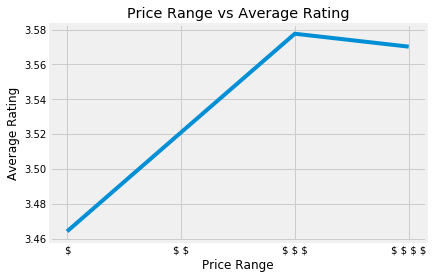

In [20]:
#Here we take our grouped data and check the average rating for each price group
figure, axes = plt.subplots()
axes.plot(restaurantByPrice.attributes_RestaurantsPriceRange2.unique(), restaurantByPrice.stars.mean())
axes.set_title('Price Range vs Average Rating')
axes.set_xlabel('Price Range')
axes.set_ylabel('Average Rating')
axes.set_xticks([1, 2, 3, 4])
axes.set_xticklabels(['\$', '\$ \$', '\$ \$ \$', '\$ \$ \$ \$'])
plt.show('Price Range vs Average Rating')

In [21]:
#Or in table form...
restaurantByPrice.stars.mean()

attributes_RestaurantsPriceRange2
1    3.464158
2    3.520940
3    3.577609
4    3.570203
Name: stars, dtype: float64

From the above graph, restaurants that sell food in the medium-high range are the most highly rated, but the difference is relatively minimal.

Every good restaurant has some sort of entertainment to keep the guests happy while they eat. Here we will explore what sort of entertainment this restaurant should have


In [22]:
#First the average rating of restaurants with TVs will be explored.
restaurantTV = restaurantsClean.dropna(subset=['attributes_HasTV', 'stars']).copy()

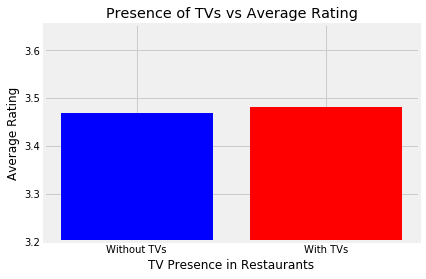

In [23]:
#Group businesses into those that have TVs and those that dont, then look at their average ratings
restaurantByTV = restaurantTV.groupby('attributes_HasTV')

figure, axes = plt.subplots()
axes.bar(restaurantByTV.attributes_HasTV.unique(), restaurantByTV.stars.mean(), color = 'br')
axes.set_title('Presence of TVs vs Average Rating')
axes.set_xlabel('TV Presence in Restaurants')
axes.set_ylabel('Average Rating')
axes.set_xticks([0, 1])
axes.set_xticklabels(['Without TVs', 'With TVs'])
axes.set_ybound(lower = 3.2)
plt.show()

In [24]:
#That graph is very close but looks like the 'With TVs' section is a little higher rated. Lets look at the table to confirm.
restaurantByTV.stars.mean()

attributes_HasTV
False    3.469308
True     3.481119
Name: stars, dtype: float64

From the graph the difference in ratings between restaurants with and without TVs is very small. Just comparing the numbers, we see that those with TVs are very slightly higher rated, but the difference is very minimal. Since many restaurants have TVs and the difference is minimal, I have elected to contiue searching for a different entertainment method while customers eat.

In [25]:
#A restaurant that allows dogs would allow guests to enjoy the company of mans best friend while they eat.
#Below this variable's relationship to average rating is analyzed.
restaurantDogs = restaurantsClean.dropna(subset=['attributes_DogsAllowed', 'stars']).copy()
restaurantByDogs = restaurantDogs.groupby('attributes_DogsAllowed')

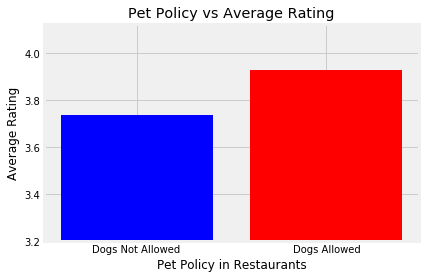

In [26]:
figure, axes = plt.subplots()
axes.bar(restaurantByDogs.attributes_DogsAllowed.unique(), restaurantByDogs.stars.mean(), color = 'br')
axes.set_title('Pet Policy vs Average Rating')
axes.set_xlabel('Pet Policy in Restaurants')
axes.set_ylabel('Average Rating')
axes.set_xticks([0, 1])
axes.set_xticklabels(['Dogs Not Allowed', 'Dogs Allowed'])
axes.set_ybound(lower = 3.2)
plt.show()

Well that was an unlikely variable to show a difference. Lets double check the number of restaurants in each cateogry to ensure the results are statistically siginificant.

In [27]:
RestaurantsWithDogs = len(restaurantDogs[restaurantDogs.attributes_DogsAllowed == True])
RestaurantsWithoutDogs = len(restaurantDogs[restaurantDogs.attributes_DogsAllowed == False])

print("Number with Dogs: {}\nNumber without Dogs: {}".format(RestaurantsWithDogs, RestaurantsWithoutDogs))
restaurantByDogs.stars.mean()

Number with Dogs: 1647
Number without Dogs: 6768


attributes_DogsAllowed
False    3.737663
True     3.929569
Name: stars, dtype: float64

So there are 1647 restaurants that allow dogs and 6768 that do not. These should be large enough quantities to make the results statistically significant.

As the above graph shows, having pets is a much more highly rated form of entertainment for customers while they dine compared to TVs. For this reason, the new restaurant will feature friendly pet dogs that guests can interact with during their meals. I believe this will be much more unique and the data suggests will be more successful than traditional TV entertainment.

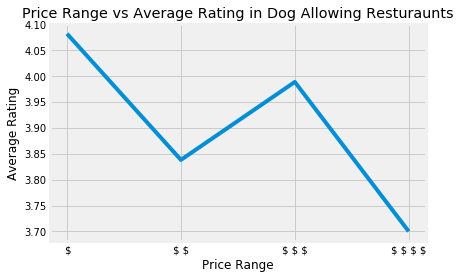

In [32]:
#Earlier it was shown that restaurants in the medium high price category had the best average rating. This may not be true in restaurants that are dog friendly.
restaurantsDogsAllowed = restaurantsClean[restaurantsClean.attributes_DogsAllowed == True]
restaurantDogsAllowedByPrice = restaurantsDogsAllowed.groupby('attributes_RestaurantsPriceRange2')

figure, axes = plt.subplots()
axes.plot(restaurantDogsAllowedByPrice.attributes_RestaurantsPriceRange2.unique(), restaurantDogsAllowedByPrice.stars.mean())
axes.set_title('Price Range vs Average Rating in Dog Allowing Restaurants')
axes.set_xlabel('Price Range')
axes.set_ylabel('Average Rating')
axes.set_xticks([1, 2, 3, 4])
axes.set_xticklabels(['\$', '\$ \$', '\$ \$ \$', '\$ \$ \$ \$'])
plt.show()

Well I suppose I should have seen that comming. It stands to reason that the most popular restauraunts with dogs around would not be pricey, formal places. The uptick in ratings from the second to third price category is a little surprising, however.

Now the only thing left is where would this restaurant best be located. In order to do this, we shall look at longitude and latitude data.

In [29]:
#Filtering out NA values from all meaningful columns for this graph.
locations = restaurantsClean.dropna(subset=['attributes_DogsAllowed', 'attributes_RestaurantsPriceRange2', 'stars', 'longitude', 'latitude']).copy()

#Only including restaurant entries where dogs are allowed, and the average rating is over 3
locationsClean = locations[locations.attributes_DogsAllowed == True]
locationsClean = locationsClean[locations.stars > 3]

E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


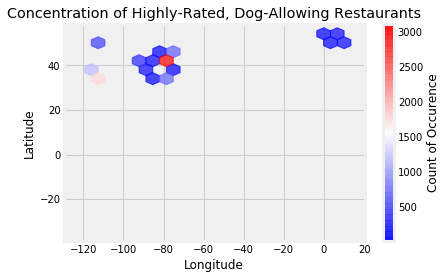

In [30]:
figure, axes = plt.subplots()
results = axes.hexbin(locations.longitude, locations.latitude, cmap='bwr', gridsize=20, mincnt=2, alpha=.7)
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_title('Concentration of Highly-Rated, Dog-Allowing Restaurants')
figure.colorbar(results, label='Count of Occurence')
plt.show()

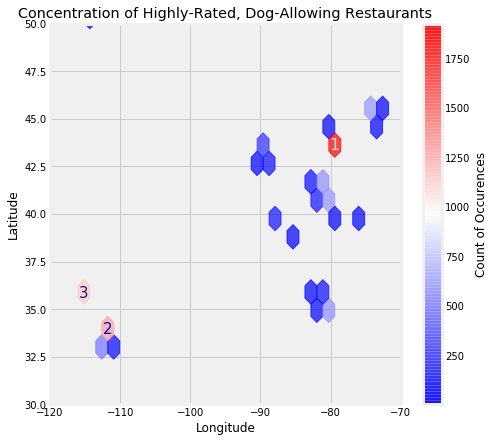

In [31]:
#While this graph gives us a rough idea of where to set up the restaurant, since it is so zoomed out, it is hard to pinpoint an ideal spot.
#In order to be more precise, the graph should be zoomed in on those areas most likely.
#In this case the top right area is looked at more closely

figure, axes = plt.subplots()
results = axes.hexbin(locations.longitude, locations.latitude, cmap='bwr', gridsize=80, mincnt=2, alpha=.7)
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_title('Concentration of Highly-Rated, Dog-Allowing Restaurants')
figure.colorbar(results, label='Count of Occurences')
axes.set_xbound(-120, -70)
axes.set_ybound(30, 50)
figure.set_size_inches(7,7)
axes.text(-80.2, 43.4, '1', size = 16, color = 'powderblue')
axes.text(-112.5, 33.7, '2', size = 15, color = 'mediumblue')
axes.text(-115.9, 35.6, '3', size = 15, color = 'midnightblue')
plt.show()

Based on the above graph, there are three ideal locations. Looking up the longitude/latitude values, the most ideal locations are: 
1. Toronto, Canada
2. Phoenix, Arizona, USA
3. Las Vegas, Nevada, USA

Although Toronto tops the list, it seems unwise to start this restaurant in a cold climate, where they cannot be open air year round. Non-open air restaurants may cause the smell of the dogs to interfere with the dining experience. For this reason, I suggest the restaurant be located in Pheonix, AZ. In addition I am not a fan of cold weather so Toronto would interfere with my happiness and ability to remain a cheery restaurant manager. As far as pricing, the data shows that restaurants that fall under the "\$" or "inexpensive" section are most highly reviewed. From Yelp's website this corresponds to items that are priced 10 dollars or less. Items at this new restaurant should be priced in this range.